# Customer Segmentation
![ima](https://miro.medium.com/max/1400/1*AW-LW6i7BPBs4ED3hCCd8w.png)

### Introduction

Let’s say, you decided to buy a t-shirt from a brand online. Have you ever thought that who else bought the same t-shirt? People, who have similar to you, right? Same age, same hobbies, same gender, etc.

Today, many businesses are going online and therefore online marketing is essential to retain customers. However, considering all customers as equal and targeting them all with similar marketing strategies is not an efficient way, since it also annoys the customers by neglecting their individuality, so customer segmentation has become very popular and has also become a viable solution. So, we actually try to find and group customers based on common characteristics such as age, gender, living area, spending behavior, etc. So that we can market the customers effectively.

The goal of customer segmentation is to divide the company’s customers based on their demographic characteristics (age, gender, marital status) and their behavior characteristics (types of products ordered, annual income). It’s a better approach for customer segmentation to focus on behavioral aspects rather than demographic characteristics since they do not emphasize individuality of customers.


### Dataset
  
#### Context
This [dataset](https://www.kaggle.com/datasets/vjchoudhary7/customer-segmentation-tutorial-in-python) is created only for the learning purpose of the customer segmentation concepts , also known as market basket analysis .
#### Content
You are owing a supermarket mall and through membership cards , you have some basic data about your customers like Customer ID, age, gender, annual income and spending score.
Spending Score is something you assign to the customer based on your defined parameters like customer behavior and purchasing data.
    

### Import library

In [40]:
import numpy as np, pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
sns.set_theme(style="ticks")
np.random.seed(0)

In [41]:
import warnings
warnings.filterwarnings('ignore')

### Load Data From CSV File

In [42]:
customers = pd.read_csv("Mall_Customers.csv")
customers.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


### Exploring the Data

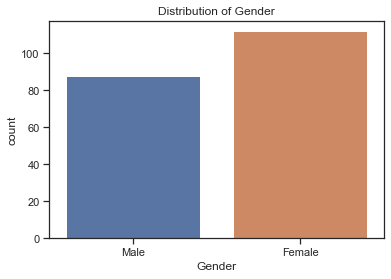

In [43]:
# See the distribution of gender to recognize different distributions
sns.countplot(x='Gender', data=customers)
plt.title('Distribution of Gender')
plt.show()

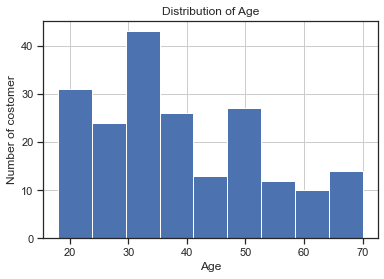

In [44]:
# Create a histogram of ages
customers.hist('Age', bins='auto')
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.title('Distribution of Age')
plt.ylabel('Number of costomer')
plt.show()

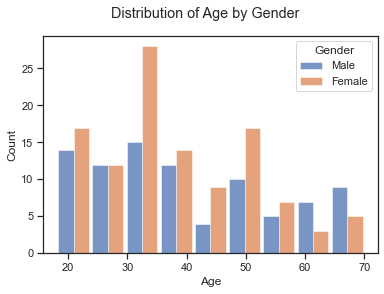

In [45]:
# Distribution of Age by Gender
sns.histplot(data=customers, x='Age', hue="Gender", multiple="dodge", shrink=.9, palette="deep",linewidth=.5, )
plt.suptitle('Distribution of Age by Gender')
plt.show()

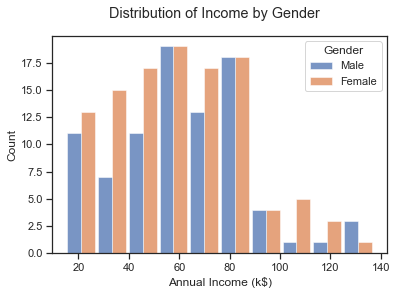

In [46]:
# Distribution of Income by Gender
sns.set_theme(style="ticks")
sns.histplot(data=customers, x='Annual Income (k$)', hue="Gender", multiple="dodge", shrink=.9, palette="deep",linewidth=.5)
plt.suptitle('Distribution of Income by Gender')
plt.show()

### Data pre-processing

In [47]:
# the size of data (200 row,5 col)
customers.shape

(200, 5)

In [48]:
# drop column 'CustomerID'
customers = customers.drop(columns='CustomerID')

In [49]:
# make sure there is no null
customers.isnull().sum()

Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [50]:
customers.dtypes

Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

In [51]:
# Replace the column Gender from categorical to numerical
customers.replace({'Gender': {'Female':0, 'Male':1}}, inplace=True)

In [52]:
# Use describe() on the data to see the descriptive statistics for each variable
customers.describe()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,0.440000,38.850000,60.560000,50.200000
std,0.497633,13.969007,26.264721,25.823522
min,0.000000,18.000000,15.000000,1.000000
25%,0.000000,28.750000,41.500000,34.750000
50%,0.000000,36.000000,61.500000,50.000000
75%,1.000000,49.000000,78.000000,73.000000
max,1.000000,70.000000,137.000000,99.000000


### Normalizing over the standard deviation
Normalization is a statistical method that helps mathematical-based algorithms to interpret features with different magnitudes and distributions equally.


In [53]:
X = customers.values[:,1:]
X = np.nan_to_num(X)
Clus_dataSet = StandardScaler().fit_transform(X)
Clus_dataSet[1:5]

array([[-1.28103541, -1.73899919,  1.19570407],
       [-1.3528021 , -1.70082976, -1.71591298],
       [-1.13750203, -1.70082976,  1.04041783],
       [-0.56336851, -1.66266033, -0.39597992]])

### Build a Modeling using K-Means Clustering

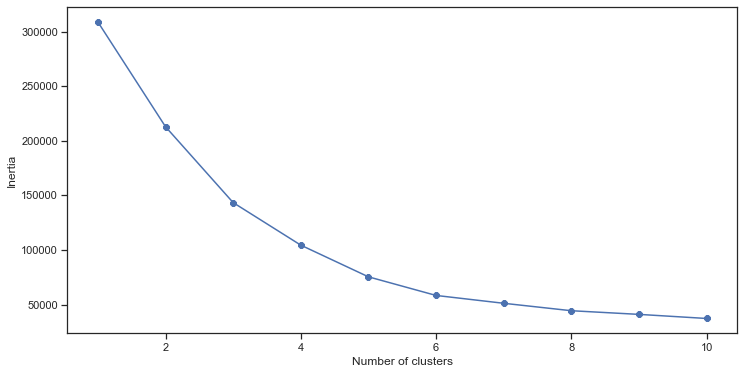

In [54]:
# Visualizing the model's performance to find the best cluster

NKC= []

for cluster in range(1,11):
    kmeans = KMeans(n_clusters = cluster, init='k-means++')
    kmeans.fit(customers)
    NKC.append(kmeans.inertia_)

plt.figure(figsize=(12,6))
plt.plot(range(1,11), NKC, marker='8')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [55]:
x = customers.loc[:,['Age','Spending Score (1-100)']].values
# K-Means Clustering with 4 clusters
k_means = KMeans(n_clusters=4)
label = k_means.fit_predict(x)
print(label)

[1 0 2 0 1 0 2 0 2 0 2 0 2 0 2 0 1 1 2 0 1 0 2 0 2 0 2 1 2 0 2 0 2 0 2 0 2
 0 2 0 3 0 3 1 2 1 3 1 1 1 3 1 1 3 3 3 3 3 1 3 3 1 3 3 3 1 3 3 1 1 3 3 3 3
 3 1 3 1 1 3 3 1 3 3 1 3 3 1 1 3 3 1 3 1 1 1 3 1 3 1 1 3 3 1 3 1 3 3 3 3 3
 1 1 1 1 1 3 3 3 3 1 1 1 0 1 0 3 0 2 0 2 0 1 0 2 0 2 0 2 0 2 0 1 0 2 0 3 0
 2 0 2 0 2 0 2 0 2 0 2 0 3 0 2 0 2 0 2 0 2 1 2 0 2 0 2 0 2 0 2 0 2 0 2 0 1
 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0]


In [56]:
k_means.cluster_centers_

array([[30.1754386 , 82.35087719],
       [27.61702128, 49.14893617],
       [43.29166667, 15.02083333],
       [55.70833333, 48.22916667]])

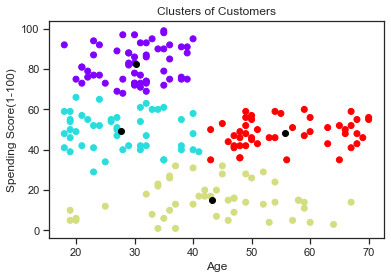

In [57]:
plt.scatter(x[:,0], x[:,1], c= label, cmap='rainbow')
plt.scatter(k_means.cluster_centers_[:,0] , k_means.cluster_centers_[:,1], color='black')
plt.title("Clusters of Customers")
plt.xlabel('Age')
plt.ylabel('Spending Score(1-100)')
plt.show()

In [58]:
x1 = customers.loc[:,['Annual Income (k$)', 'Spending Score (1-100)']].values
# K-Means Clustering with 5 clusters
k_means = KMeans(n_clusters=5)
labels = k_means.fit_predict(x1)
print(labels)

[4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4
 0 4 0 4 0 4 3 4 0 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 2 1 2 3 2 1 2 1 2 3 2 1 2 1 2 1 2 1 2 3 2 1 2 1 2
 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1
 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2]


In [59]:
k_means.cluster_centers_

array([[25.72727273, 79.36363636],
       [88.2       , 17.11428571],
       [86.53846154, 82.12820513],
       [55.2962963 , 49.51851852],
       [26.30434783, 20.91304348]])

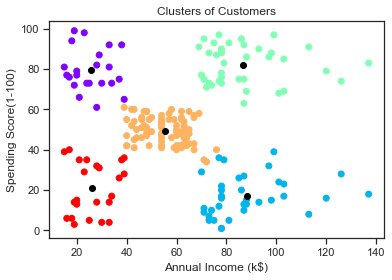

In [60]:
plt.scatter(x1[:,0], x1[:,1], c= labels, cmap='rainbow')
plt.scatter(k_means.cluster_centers_[:,0] , k_means.cluster_centers_[:,1], color='black')
plt.title('Clusters of Customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score(1-100)')
plt.show()

### Insights

In [75]:
# We assign the labels to each row in the dataframe
customers["Clus"] = label
customers.head(5)

,Gender,Age,Annual Income (k$),Spending Score (1-100),Clus_km,Clus
0,1,19,15,39,1,1
1,1,21,15,81,0,0
2,0,20,16,6,2,2
3,0,23,16,77,0,0
4,0,31,17,40,1,1


In [62]:
#To compare attributes of the different clusters, lets find the average of all variables across each cluster
avg_customers = customers.groupby(['Clus_km'], as_index=False).mean()
avg_customers

,Clus_km,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,0,0.421053,30.175439,66.070175,82.350877
1,1,0.382979,27.617021,53.276596,49.148936
2,2,0.500000,43.291667,66.937500,15.020833
3,3,0.458333,55.708333,54.770833,48.229167


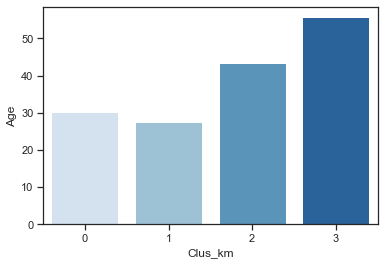

In [63]:
sns.barplot(x='Clus_km',y='Age',data=avg_customers, palette = 'Blues')
plt.show()

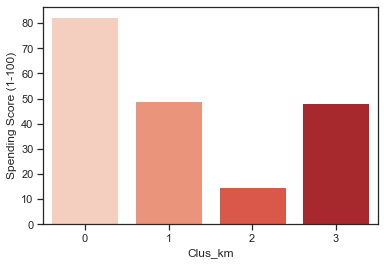

In [64]:
sns.barplot(x='Clus_km',y='Spending Score (1-100)',data=avg_customers , palette = 'Reds')
plt.show()

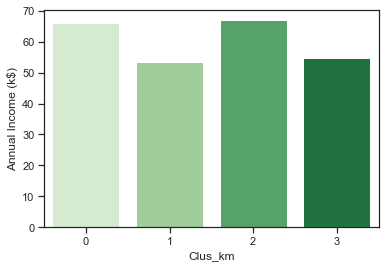

In [65]:
sns.barplot(x='Clus_km',y='Annual Income (k$)',data=avg_customers,palette = 'Greens')
plt.show()

### Principal Component Analysis(PCA)
What we will do here is apply dimensionality reduction to simplify our problem.

In [66]:
Clus_dataSet = StandardScaler().fit_transform(customers)

In [67]:
# Apply dimensionality reduction to simplify our problem
pca_customer = PCA()
pca_customer.fit(Clus_dataSet) 

PCA()

In [68]:
principal_customer = pd.DataFrame(data = Clus_dataSet
             , columns = customers.columns)

In [69]:
principal_customer.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),Clus_km
0,1.128152,-1.424569,-1.738999,-0.434801,-0.382142
1,1.128152,-1.281035,-1.738999,1.195704,-1.260628
2,-0.886405,-1.352802,-1.700830,-1.715913,0.496345
3,-0.886405,-1.137502,-1.700830,1.040418,-1.260628
4,-0.886405,-0.563369,-1.662660,-0.395980,-0.382142


In [70]:
# Explained variance ratio by each component
print('Explained variation per principal component: {}'.format(pca_customer.explained_variance_ratio_))

Explained variation per principal component: [0.43136982 0.21195003 0.18659222 0.1354374  0.03465053]


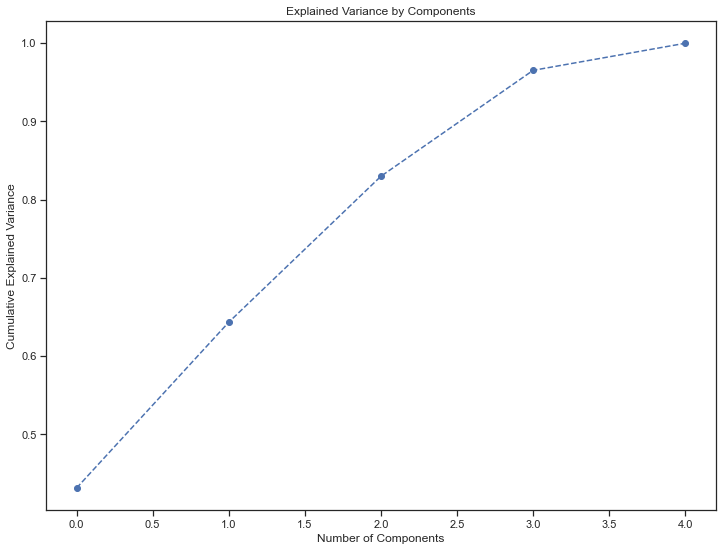

In [71]:
# plot the cumulative sum of explained variance
plt.figure(figsize = (12,9))
plt.plot(pca_customer.explained_variance_ratio_.cumsum(), marker = 'o', linestyle = '--')
plt.title('Explained Variance by Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.show()

Well, How do we choose the right number of components? The answer is there is no right or wrong answer for that.

But, a rule of thumb is to keep at least 70 to 80 percent of the explained variance.

80 % of the variance of the data is explained by the first 3 components. Let’s keep the first 3 components for our further analysis.

In [72]:
pca = PCA(n_components = 3)
pca.fit(Clus_dataSet)
pca.components_

array([[ 0.0804744 ,  0.55815729, -0.0590252 , -0.51432011,  0.64340902],
       [ 0.6836412 ,  0.0157409 ,  0.7268121 , -0.03028307, -0.05669252],
       [-0.72522505,  0.07156565,  0.68008086, -0.07322655,  0.03247886]])

In [73]:
pca_c= pd.DataFrame(data = pca.components_,
                           columns = customers.columns,
              index = ['Component 1', 'Component 2', 'Component 3'])
pca_c

,Gender,Age,Annual Income (k$),Spending Score (1-100),Clus_km
Component 1,0.080474,0.558157,-0.059025,-0.514320,0.643409
Component 2,0.683641,0.015741,0.726812,-0.030283,-0.056693
Component 3,-0.725225,0.071566,0.680081,-0.073227,0.032479


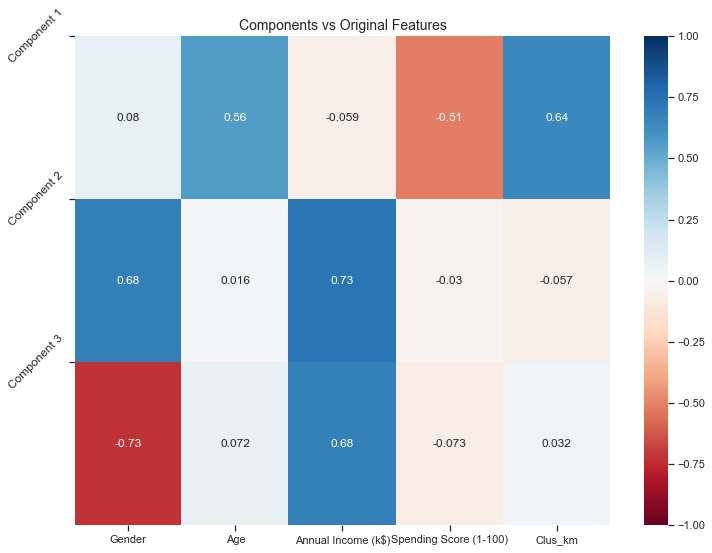

In [74]:
plt.figure(figsize=(12,9))
sns.heatmap(pca_c,
            vmin = -1, 
            vmax = 1,
            cmap = 'RdBu',
            annot = True)
plt.yticks([0, 1, 2], 
           ['Component 1', 'Component 2', 'Component 3'],
           rotation = 45,
           fontsize = 12)
plt.title('Components vs Original Features',fontsize = 14)
plt.show()

#### Conclusion:
1) We see that there is a positive correlation between Component1 and Age and Gender.

2) For the second component Gender, Age and income are by far the most prominent determinants.

3) For the final component, we realize that Age and incoume are the most important features. 

<b>Ref</b>:
1. https://techvidvan.com/tutorials/customer-segmentation-using-machine-learning/
2. https://medium.com/@ugursavci/step-by-step-customer-segmentation-using-k-means-and-pca-in-python-5733822295b6
3. https://www.kaggle.com/code/hainescity/mall-customer-segmentation-kmeans-pt-br
4. https://www.youtube.com/watch?v=4jv1pUrG0Zk
5. https://www.datacamp.com/tutorial/principal-component-analysis-in-python
6. https://jakevdp.github.io/PythonDataScienceHandbook/05.09-principal-component-analysis.html
    